## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np
import os

# Study data files
mouse_metadata_path = ("Resources/Unit 5 - Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv")
study_results_path = ("Resources/Unit 5 - Matplotlib_Homework_Instructions_Pymaceuticals_data_Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

comb_mouse_df = mouse_metadata_df.merge(study_results_df, on = "Mouse ID")

# Display the data table for preview

comb_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_duplicates = comb_mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
df_new = cleaned_duplicates.rename(columns= {'Tumor Volume (mm3)':'Tumor_volume'} )
df_new

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dropped_df = comb_mouse_df[comb_mouse_df.duplicated(['Mouse ID','Timepoint'], keep='first')]
dropped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.
df_new.count()

Mouse ID            1888
Drug Regimen        1888
Sex                 1888
Age_months          1888
Weight (g)          1888
Timepoint           1888
Tumor_volume        1888
Metastatic Sites    1888
dtype: int64

## Summary Statistics

In [8]:
clean_duplicates = df_new.groupby("Drug Regimen").Tumor_volume.agg(['mean','median','var','std','sem'])
clean_duplicates

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

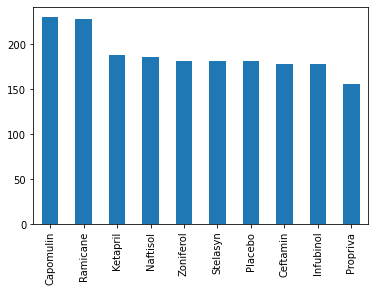

In [10]:
#x_axis = df_new['Drug Regimen'].unique()

#y_axis = df_new['Mouse ID'].nunique()

#y_axis

#Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows  the number of 
#total mice for each treatment regimen throughout the course of the study.

counts = df_new['Drug Regimen'].value_counts()
counts.plot(kind="bar")

#plt.bar(x_axis, y_axis)


#plt.show



<BarContainer object of 10 artists>

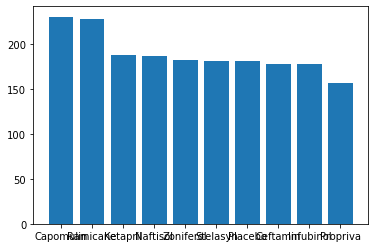

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
counts = df_new['Drug Regimen'].value_counts()
y_axis = counts.values 
x_axis = counts.index.values
#print(counts.values)

plt.bar(x_axis, y_axis)
# print(counts)

# print(df_new['Drug Regimen'].unique())

# print(counts.values)
# print(counts.index.values)

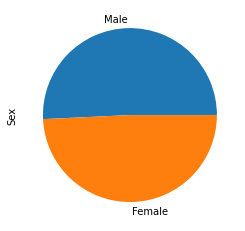

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = df_new['Sex'].value_counts()
counts.plot(kind='pie')


[958 930]
['Male' 'Female']


ValueError: could not convert string to float: 'Male'

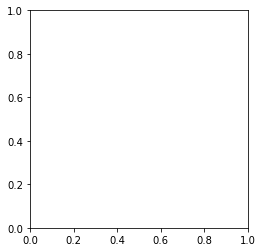

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = df_new['Sex'].value_counts()

y_axis = counts.values 

x_axis = counts.index.values
print(y_axis)
print(x_axis)

plt.pie(x_axis,y_axis)
plt.xticks(ticks = counts)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouping = df_new.groupby(['Drug Regimen','Mouse ID']).Timepoint.agg('max')
grouped_new_df = pd.DataFrame(grouping)
grouped_new_df

last_timepoint = df_new.groupby(['Drug Regimen','Mouse ID']).Tumor_volume.agg('max')
last_time = pd.DataFrame(last_timepoint)
last_time


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
comb_tumor_time = pd.merge(grouped_new_df,last_time, on = ['Drug Regimen','Mouse ID'])
comb_tumor_time


Timepoint  Tumor_volume
Drug Regimen Mouse ID                         
Capomulin    b128             45     45.651331
             b742             45     45.000000
             f966             20     45.000000
             g288             45     46.304003
             g316             45     46.809225
...                          ...           ...
Zoniferol    q633             45     70.827796
             s337             45     62.109651
             w140              5     47.717952
             w575             45     68.401286
             x613             15     48.077646

[249 rows x 2 columns]

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)

stat_four_treat_df = comb_tumor_time.loc[treatments]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = stat_four_treat_df['Tumor_volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Tumor_Volume = stat_four_treat_df.loc[(stat_four_treat_df['Tumor_volume'] < lower_bound) | (stat_four_treat_df['Tumor_volume'] > upper_bound)]
outlier_Tumor_Volume
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Tumor Volume is: 45.5098442875
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 14.420417467500002
The the median of Tumor Volume is: 46.860058175 
Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


,,Timepoint,Tumor_volume
Drug Regimen,Mouse ID,,


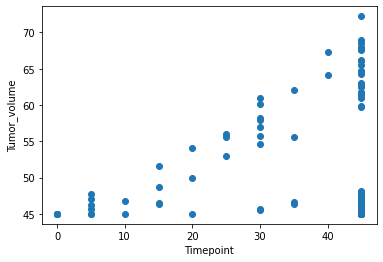

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.scatter(stat_four_treat_df['Timepoint'],stat_four_treat_df['Tumor_volume'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor_volume")
plt.show()

## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# test = comb_tumor_time.loc[comb_tumor_time['Capomulin'] & (comb_tumor_time['Mouse ID'] == 'g316')]
# test
#& (comb_tumor_time['Mouse ID'].str.startswith('S')),['Name','FT_Team']]

x = comb_tumor_time.loc['Capomulin','Tumor_volume']
# y = comb_tumor_time.loc['Capomulin','Tumor_volume']
x
# plt.plot(y,x)

# plt.show()

# comb_tumor_time_df.loc['Capomulin','Tumor_volume'],


Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
i557    47.685963
i738    45.595685
j119    48.158209
j246    46.408361
l509    48.070452
l897    46.154737
m601    45.000000
m957    46.414518
r157    46.539206
r554    45.781746
r944    47.373423
s185    45.000000
s710    45.000000
t565    46.749006
u364    47.212200
v923    45.704434
w150    45.000000
w914    45.893720
x401    45.473753
y793    45.000000
Name: Tumor_volume, dtype: float64

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#x = comb_tumor_time_df.loc['Capomulin','Timepoint']
y = comb_tumor_time_df.loc['Capomulin','Tumor_volume'].agg[(['mean'])
y
# plt.scatter(y,x)

# plt.show()


SyntaxError: invalid syntax (<ipython-input-20-49e95568fbd9>, line 4)

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
